In [1]:
import pandas as pd
import matplotlib
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.1)
sns.set_palette('viridis')
from glob import glob
from pathlib import Path
import os
metric_nice = {
    'auditor_fn_violation':'FN Violation',
    'auditor_fp_violation':'FP Violation',
    'accuracy':'1-Accuracy',
    'auc_prc':'AUPRC',
    'ave_precision_score':'APS',
    'auc_roc':'AUROC',
    'subgroup_fpr':'Subgroup FP',
    'subgroup_fnr':'Subgroup FN',
}
hv_nice = {}
for k1,v1 in metric_nice.items():
    for k2,v2 in metric_nice.items():
        hv_nice.update({f'hv({k1}:{k2})': f'HV({v1}, {v2})'})
Order = [
    'gerryfair_lr_fnr',
    'gerryfair_lr_fpr',
    'gerryfair_xgb_fnr',
    'gerryfair_xgb_fpr',
#     'feat_random_p100_g0',
    #          'feat_tourn',
    #          'feat_lex',
    #          'feat_nsga2',
    #          'feat_flex',
    #          'feat_flex2',
    #          'feat_flex_nsga2',
    #          'feat_flex2_nsga2',
    'fomo_nsga2_lr_fpr',
    'fomo_nsga2_lr_fnr',
    'fomo_nsga2_lr_fpr_linear',
    'fomo_nsga2_lr_fnr_linear',
    'fomo_nsga2_lr_fpr_mlp',
    'fomo_nsga2_lr_fnr_mlp',
    'fomo_nsga2_xgb_fpr',
    'fomo_nsga2_xgb_fnr',
    'fomo_nsga2_xgb_fpr_linear',
    'fomo_nsga2_xgb_fnr_linear',
    'fomo_nsga2_xgb_fpr_mlp',
    'fomo_nsga2_xgb_fnr_mlp',
]
method_nice = {
    'gerryfair_lr_fnr':'GerryFair-LR',
    'gerryfair_lr_fpr':'GerryFair-LR',
    'gerryfair_xgb_fnr':'GerryFair-XGB',
    'gerryfair_xgb_fpr':'GerryFair-XGB',
#     'gerryfair_':'GerryFair',
#     'gerryfair':'GerryFair',
#     'gerryfair_xgb':'GerryFairGB',
#     'feat_lex':'LEX',
    'feat_random_p100_g0':'Random',
#     'feat_tourn':'Tourn',
#     'feat_flex2':'FLEX',
#     'feat_nsga2':'NSGA2',
#     'feat_flex_nsga2':'FLEX-NSGA2',
#     'feat_flex2_nsga2':'FLEX-NSGA2',
    'fomo_nsga2_lr_fnr':'FOMO-LR',
    'fomo_nsga2_lr_fpr':'FOMO-LR',
    'fomo_nsga2_lr_fnr_linear':'FOMO-LR-Lin',
    'fomo_nsga2_lr_fpr_linear':'FOMO-LR-Lin',
    'fomo_nsga2_lr_fnr_mlp':'FOMO-LR-NN',
    'fomo_nsga2_lr_fpr_mlp':'FOMO-LR-NN',
    'fomo_nsga2_xgb_fnr':'FOMO-XGB',
    'fomo_nsga2_xgb_fpr':'FOMO-XGB',
    'fomo_nsga2_xgb_fnr_linear':'FOMO-XGB-Lin',
    'fomo_nsga2_xgb_fpr_linear':'FOMO-XGB-Lin',
    'fomo_nsga2_xgb_fnr_mlp':'FOMO-XGB-NN',
    'fomo_nsga2_xgb_fpr_mlp':'FOMO-XGB-NN' 
}

# rdirs = ['../fair_gp/analysis/results/', '../results']
rdirs = [
#     '../results_23-02-06/',
    '../results_combined/',
#     '../results_23-02-07/',
#     '../results_23-02-08/',
#     '../fair_gp/analysis/results/'
]
figdir = '../../paper/figs/hypervolume_comparison'
os.makedirs(figdir, exist_ok=True)

# load data 

In [2]:
frames = []
for rdir in rdirs:
    for f in Path(rdir).rglob('*.updated'):
        if 'lsac_bar' in str(f): 
            continue
#     for f in Path(rdir).rglob('*.csv'):
#         uf = str(f) + '.updated'
#         if os.path.exists(uf):
#             f = uf 
#             print('using updated path for ',uf)
#         print(f)
        df = pd.read_csv(f)
        frames.append(df)
# convert train column to 'train', 'test'
df_all = pd.concat(frames)
for m, dfgm in df_all.groupby('method'):
    for d, dfgmd in dfgm.groupby('dataset'):
        print('# results for',m,'on',d,':',len(dfgmd))
df_all['fold'] = df_all['train'].apply(lambda x: 'train' if x else 'test')
print(df_all.method.unique())
print(df_all.method.unique())
print('seeds (',df_all.seed.nunique(),'):',','.join([str(i) for i in df_all.seed.unique()]))
df_all = df_all.loc[df_all.method.isin(Order)]
df_all['method_nice'] = df_all['method'].apply(lambda x: method_nice[x])

df_train = df_all[df_all.fold=='train']
df_test = df_all[df_all.fold=='test']

# results for fomo_nsga2_lr_fnr on adult : 800
# results for fomo_nsga2_lr_fnr on communities : 800
# results for fomo_nsga2_lr_fnr on lawschool : 800
# results for fomo_nsga2_lr_fnr on student : 800
# results for fomo_nsga2_lr_fnr_linear on adult : 800
# results for fomo_nsga2_lr_fnr_linear on communities : 800
# results for fomo_nsga2_lr_fnr_linear on lawschool : 800
# results for fomo_nsga2_lr_fnr_linear on student : 800
# results for fomo_nsga2_lr_fnr_mlp on adult : 800
# results for fomo_nsga2_lr_fnr_mlp on communities : 800
# results for fomo_nsga2_lr_fnr_mlp on lawschool : 800
# results for fomo_nsga2_lr_fnr_mlp on student : 800
# results for fomo_nsga2_lr_fpr on adult : 800
# results for fomo_nsga2_lr_fpr on communities : 800
# results for fomo_nsga2_lr_fpr on lawschool : 800
# results for fomo_nsga2_lr_fpr on student : 800
# results for fomo_nsga2_lr_fpr_linear on adult : 800
# results for fomo_nsga2_lr_fpr_linear on communities : 800
# results for fomo_nsga2_lr_fpr_linear on 

In [3]:
OrderNice = []
for x in Order:
    if method_nice[x] not in OrderNice:
        OrderNice.append(method_nice[x])

In [4]:
df_test.groupby(['method','dataset'])['seed'].nunique().unstack()

dataset,adult,communities,lawschool,student
method,,,,
fomo_nsga2_lr_fnr,20,20,20,20
fomo_nsga2_lr_fnr_linear,20,20,20,20
fomo_nsga2_lr_fnr_mlp,20,20,20,20
fomo_nsga2_lr_fpr,20,20,20,20
fomo_nsga2_lr_fpr_linear,20,20,20,20
fomo_nsga2_lr_fpr_mlp,20,20,20,20
fomo_nsga2_xgb_fnr,20,17,20,20
fomo_nsga2_xgb_fnr_linear,20,20,20,6
fomo_nsga2_xgb_fnr_mlp,20,20,17,10


In [5]:
df_test.groupby(['method','dataset']).count()

seed  train  \
method                   dataset                    
fomo_nsga2_lr_fnr        adult         400    400   
                         communities   400    400   
                         lawschool     400    400   
                         student       400    400   
fomo_nsga2_lr_fnr_linear adult         400    400   
...                                    ...    ...   
gerryfair_xgb_fnr        student       380    380   
gerryfair_xgb_fpr        adult         280    280   
                         communities   360    360   
                         lawschool     340    340   
                         student       360    360   

                                      hv(auditor_fp_violation:accuracy)  \
method                   dataset                                          
fomo_nsga2_lr_fnr        adult                                       20   
                         communities                                 20   
                         lawschool                                   20   
                         student                                     20   
fomo_nsga2_lr_fnr_linear adult                                       20   
...                                                                 ...   
gerryfair_xgb_fnr        student                                     19   
gerryfair_xgb_fpr        adult                                       14   
                         communities                                 18   
                         lawschool                                   17   
                         student                                     18   

                                      hv(auditor_fp_violation:ave_precision_score)  \
method                   dataset                                                     
fomo_nsga2_lr_fnr        adult                                                  20   
                         communities                                            20   
                         lawschool                                              20   
                         student                                                20   
fomo_nsga2_lr_fnr_linear adult                                                  20   
...                                                                            ...   
gerryfair_xgb_fnr        student                                                19   
gerryfair_xgb_fpr        adult                                                  14   
                         communities                                            18   
                         lawschool                                              17   
                         student                                                18   

                                      hv(auditor_fp_violation:auc_prc)  \
method                   dataset                                         
fomo_nsga2_lr_fnr        adult                                      20   
                         communities                                20   
                         lawschool                                  20   
                         student                                    20   
fomo_nsga2_lr_fnr_linear adult                                      20   
...                                                                ...   
gerryfair_xgb_fnr        student                                    19   
gerryfair_xgb_fpr        adult                                      14   
                         communities                                18   
                         lawschool                                  17   
                         student                                    18   

                                      hv(auditor_fp_violation:auc_roc)  \
method                   dataset                                         
fomo_nsga2_lr_fnr        adult                                      20   
                         communities                                

In [6]:
df_all.columns

Index(['method', 'dataset', 'seed', 'train',
       'hv(auditor_fp_violation:accuracy)',
       'hv(auditor_fp_violation:ave_precision_score)',
       'hv(auditor_fp_violation:auc_prc)', 'hv(auditor_fp_violation:auc_roc)',
       'hv(auditor_fp_violation:mae)', 'hv(auditor_fn_violation:accuracy)',
       'hv(auditor_fn_violation:ave_precision_score)',
       'hv(auditor_fn_violation:auc_prc)', 'hv(auditor_fn_violation:auc_roc)',
       'hv(auditor_fn_violation:mae)', 'hv(subgroup_fpr:accuracy)',
       'hv(subgroup_fpr:ave_precision_score)', 'hv(subgroup_fpr:auc_prc)',
       'hv(subgroup_fpr:auc_roc)', 'hv(subgroup_fpr:mae)',
       'hv(subgroup_fnr:accuracy)', 'hv(subgroup_fnr:ave_precision_score)',
       'hv(subgroup_fnr:auc_prc)', 'hv(subgroup_fnr:auc_roc)',
       'hv(subgroup_fnr:mae)', 'fold', 'method_nice'],
      dtype='object')

## training results

In [7]:
# plot_cols = [c for c in df_all.columns if 'hv' in c]

# for col in plot_cols:
#     h = plt.figure(figsize=(7.5,7.5))
#     i = 1
#     for dataset,dfg in df_train.groupby('dataset'):
#         ax = h.add_subplot(2,3,i)
#         sns.boxplot(data=dfg, x='method_nice',y=col, notch=True, order=OrderNice,palette='Spectral')
#         plt.title(dataset)
#         y1 = metric_nice[col.split('(')[-1].split(':')[0]]
#         y2 = metric_nice[col.split(':')[-1][:-1]]
#         if i%2 !=0:
#             plt.ylabel('Hypervolume (' + y1 +', '+y2+')')
#         else:
#             plt.ylabel('')
#         if i < 3:
#             ax.set_xticklabels([])
#             ax.set_xlabel('')
#         else:
#             ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#         plt.xlabel('')
#         i += 1
    
#     plt.tight_layout()
#     plt.savefig(figdir+'/training_'+col.replace('(','-').replace(':','-')[:-1] +'.pdf',
#                bbox_inches='tight')


## test results

In [8]:
# plot_cols = [c for c in df_all.columns if 'hv' in c]

# df_plt = df_test.melt(
#     value_vars = plot_cols,
#     id_vars = ['method','method_nice','dataset']
# )
# df_plt
# sns.catplot(
#     kind='box',
# #     kind='strip',
#     data=df_plt,
#     y='method_nice',
#     x='value',
#     hue='method_nice',
#     order=OrderNice,
#     row='variable',
#     col='dataset',
#     facet_kws=dict(
#         margin_titles=True,
# #         sharey=False
#     ),
# #     margin_titles=True,
# #     sharex=False,
#     height=6
# )

saving ../../paper/figs/hypervolume_comparison/hv_subgroup_fpr-auc_roc_.pdf
saving ../../paper/figs/hypervolume_comparison/hv_subgroup_fnr-auc_roc_.pdf


<Figure size 750x750 with 0 Axes>

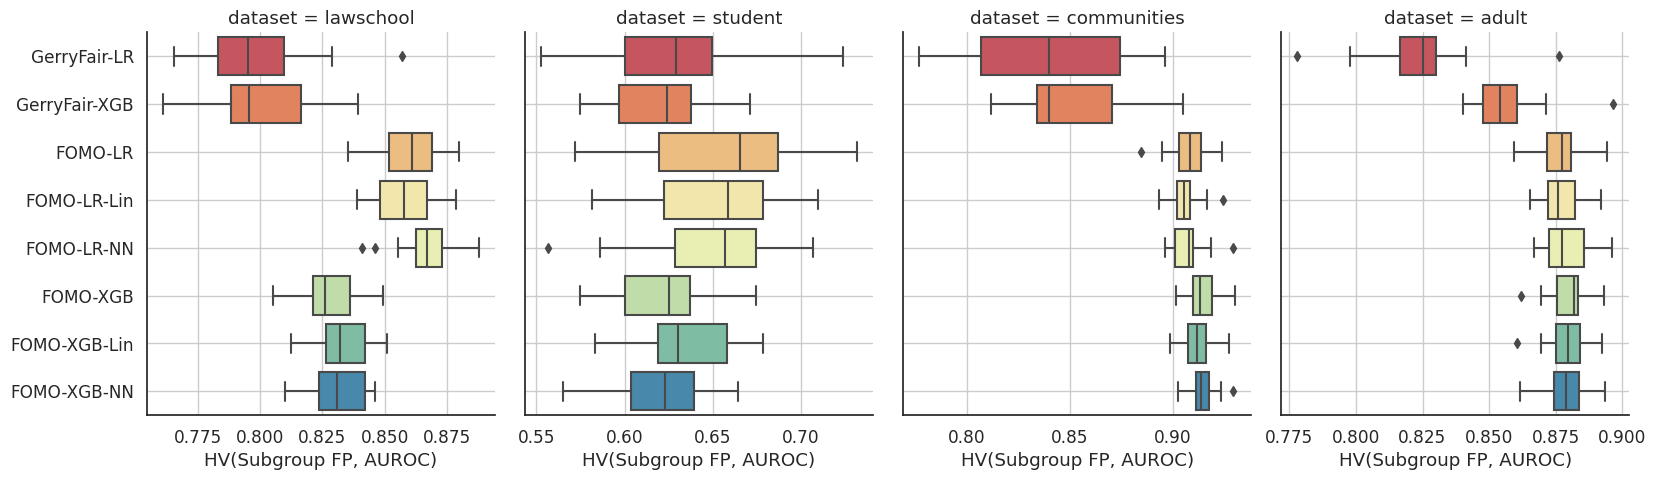

<Figure size 750x750 with 0 Axes>

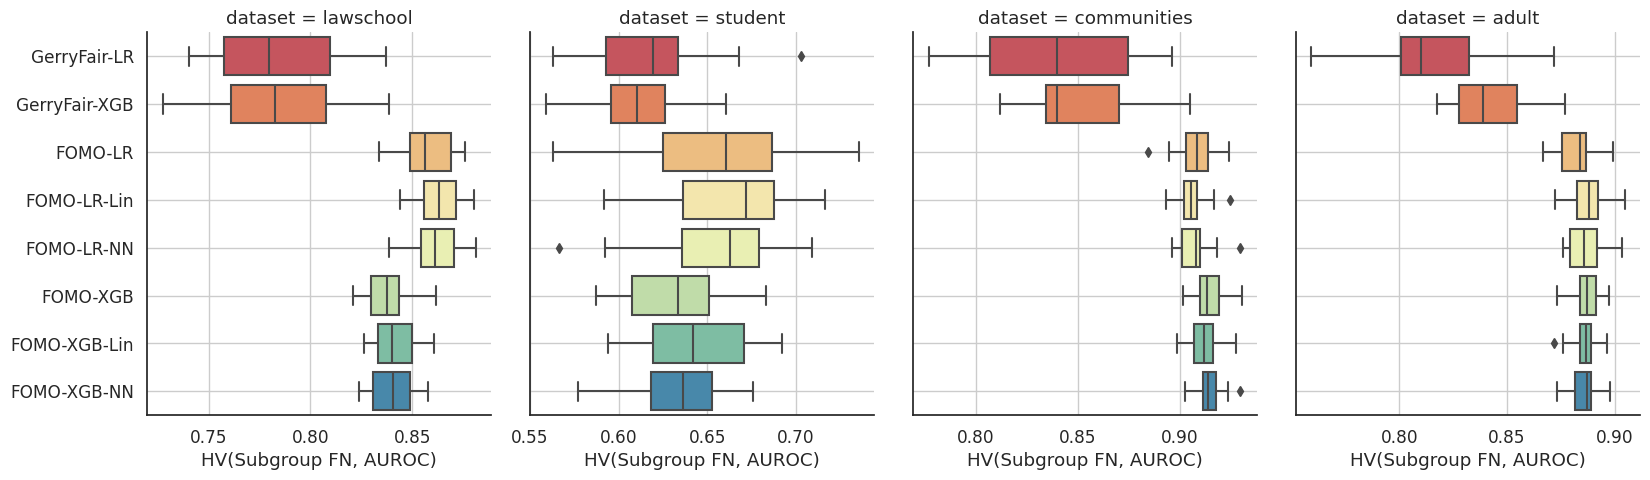

In [29]:
# test figures
sns.set_style('white')
plot_cols = [c for c in df_all.columns if 'hv' in c]
plot_cols = [
    'hv(subgroup_fpr:auc_roc)',
    'hv(subgroup_fnr:auc_roc)' 
]
for col in plot_cols:
    h = plt.figure(figsize=(7.5,7.5))
    i = 1
    FN = '_fn_' in col
    if FN:
        order = [o for o in Order if 'fpr' not in o.lower()]
    else:
        order = [o for o in Order if 'fnr' not in o.lower()]
        
    g = sns.catplot(
        kind='box',
        data=df_test, #.loc[df_test.dataset==dataset],
        y='method',
        x=col,
#         notch=True,
#         bootstrap=10000,
        order=order,
        palette='Spectral',
        col='dataset',
#         col_wrap=2
        sharex=False,
        aspect=0.9
    )
    g.set_xlabels(hv_nice[col])
    g.set_yticklabels([method_nice[o] for o in order])
    g.set(ylabel='')
    for k,ax in g.axes_dict.items():
        ax.grid(axis='y')  #just add this
        ax.grid(axis='x')  #just add this
#     plt.ylabel('')
    savename = f'{figdir}/{col.replace(":","-").replace("(","_").replace(")","_")}.pdf'
    print('saving',savename)
    plt.savefig(
        savename,
        dpi=400,
        bbox_inches='tight'
    )

# get normalized scores and rankings

In [10]:
import pdb
# get rankings
# tmp = df_reg.groupby(['dataset','method'])['score']
ranks = []
plot_cols = [c for c in df_all.columns if 'hv' in c]
print('plot_cols:',plot_cols)
df_ranks = pd.DataFrame(dtype=float)
df_sum_norms = pd.DataFrame(dtype=float)
# df_norms = df_test.copy()
df_norms = pd.DataFrame()

first = True
import pdb
for col in plot_cols:
    if '_fn_' in col:
        matches = [o for o in Order if 'fpr' not in o.lower()]
    else:
        matches = [o for o in Order if 'fnr' not in o.lower()]
        
    df_match = df_test.loc[df_test.method.isin(matches)]
    df_match.loc[:,'method_nice'] = df_match['method'].apply(lambda x:method_nice[x])    
    xmin = df_match[col].min()
    xmax = df_match[col].max()
    new_col = col+'_norm'
    df_match.loc[:,new_col]=df_match.groupby(['dataset'])[col].transform(
        lambda x: (x - xmin) / (xmax - xmin)
    )
    keep_cols = [new_col,'dataset','method_nice','seed']
    df_merge = df_match[keep_cols].dropna()
#     pdb.set_trace()
    if first:
        df_norms = df_merge
        first = False
    else:
        df_norms = df_norms.merge(df_merge, on=['dataset','method_nice','seed'], how='outer')
#     df_ranks.merge(df_tmp)
df_norms

plot_cols: ['hv(auditor_fp_violation:accuracy)', 'hv(auditor_fp_violation:ave_precision_score)', 'hv(auditor_fp_violation:auc_prc)', 'hv(auditor_fp_violation:auc_roc)', 'hv(auditor_fp_violation:mae)', 'hv(auditor_fn_violation:accuracy)', 'hv(auditor_fn_violation:ave_precision_score)', 'hv(auditor_fn_violation:auc_prc)', 'hv(auditor_fn_violation:auc_roc)', 'hv(auditor_fn_violation:mae)', 'hv(subgroup_fpr:accuracy)', 'hv(subgroup_fpr:ave_precision_score)', 'hv(subgroup_fpr:auc_prc)', 'hv(subgroup_fpr:auc_roc)', 'hv(subgroup_fpr:mae)', 'hv(subgroup_fnr:accuracy)', 'hv(subgroup_fnr:ave_precision_score)', 'hv(subgroup_fnr:auc_prc)', 'hv(subgroup_fnr:auc_roc)', 'hv(subgroup_fnr:mae)']


/tmp/ipykernel_590874/2023610720.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match.loc[:,'method_nice'] = df_match['method'].apply(lambda x:method_nice[x])
/tmp/ipykernel_590874/2023610720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match.loc[:,new_col]=df_match.groupby(['dataset'])[col].transform(
/tmp/ipykernel_590874/2023610720.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,hv(auditor_fp_violation:accuracy)_norm,dataset,method_nice,seed,hv(auditor_fp_violation:ave_precision_score)_norm,hv(auditor_fp_violation:auc_prc)_norm,hv(auditor_fp_violation:auc_roc)_norm,hv(auditor_fp_violation:mae)_norm,hv(auditor_fn_violation:accuracy)_norm,hv(auditor_fn_violation:ave_precision_score)_norm,...,hv(subgroup_fpr:accuracy)_norm,hv(subgroup_fpr:ave_precision_score)_norm,hv(subgroup_fpr:auc_prc)_norm,hv(subgroup_fpr:auc_roc)_norm,hv(subgroup_fpr:mae)_norm,hv(subgroup_fnr:accuracy)_norm,hv(subgroup_fnr:ave_precision_score)_norm,hv(subgroup_fnr:auc_prc)_norm,hv(subgroup_fnr:auc_roc)_norm,hv(subgroup_fnr:mae)_norm
0,0.888273,lawschool,FOMO-XGB-Lin,16695,0.897623,0.886288,0.824693,0.635870,0.877972,0.890159,...,0.848308,0.880711,0.873566,0.741710,0.602088,0.852274,0.892332,0.884416,0.745788,0.617797
1,0.923536,lawschool,FOMO-LR-NN,15860,0.951260,0.940987,0.930404,0.558652,0.915074,0.966923,...,0.886208,0.945283,0.937103,0.844653,0.536455,0.888345,0.949637,0.945254,0.846435,0.548199
2,0.916738,lawschool,FOMO-LR,10197,0.925216,0.914831,0.887046,0.537098,0.879052,0.899284,...,0.875822,0.909572,0.902336,0.797740,0.508207,0.875359,0.910161,0.903673,0.793218,0.516978
3,0.897186,lawschool,FOMO-LR-Lin,12092,0.873086,0.860559,0.851888,0.549293,0.883669,0.852572,...,0.856323,0.854178,0.846782,0.764741,0.518314,0.870874,0.889462,0.880812,0.791849,0.555177
4,0.891922,lawschool,FOMO-LR,24284,0.962634,0.953313,0.921808,0.553207,0.932127,0.994495,...,0.852295,0.948777,0.941193,0.829437,0.524103,0.842962,0.927767,0.922532,0.805780,0.515764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,NaN,student,FOMO-XGB-Lin,15860,NaN,NaN,NaN,NaN,0.593566,0.446371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,NaN,student,FOMO-XGB-NN,27690,NaN,NaN,NaN,NaN,0.613141,0.291638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,NaN,student,GerryFair-LR,6654,NaN,NaN,NaN,NaN,0.460330,0.110451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620,NaN,student,GerryFair-XGB,14724,NaN,NaN,NaN,NaN,0.282070,0.188767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# df_test.groupby(['method_nice','dataset'])
# df_test.groupby(['method_nice','dataset'])['hv(subgroup_fpr:auc_roc)'].mean().unstack()

# df_test.groupby(['method_nice'])['hv(subgroup_fpr:auc_roc)'].mean()

In [12]:
df_norms.groupby(['method_nice','dataset'])['hv(subgroup_fpr:auc_roc)_norm'].mean().unstack()

dataset,adult,communities,lawschool,student
method_nice,,,,
FOMO-LR,0.858568,0.938895,0.814417,0.275814
FOMO-LR-Lin,0.859395,0.935468,0.807489,0.262802
FOMO-LR-NN,0.864662,0.938164,0.831614,0.246685
FOMO-XGB,0.867094,0.956895,0.729612,0.184513
FOMO-XGB-Lin,0.864495,0.950561,0.741217,0.217061
FOMO-XGB-NN,0.863186,0.956971,0.739690,0.179597
GerryFair-LR,0.717075,0.768938,0.649660,0.188916
GerryFair-XGB,0.805776,0.790393,0.654021,0.179983


In [13]:
# get rankings
# tmp = df_reg.groupby(['dataset','method'])['score']
ranks = []
plot_cols = [c for c in df_all.columns if 'hv' in c]
print('plot_cols:',plot_cols)
df_ranks = pd.DataFrame(dtype=float)
df_sum_norms = pd.DataFrame(dtype=float)
df_norms = df_test.copy()

first = True
import pdb
for col in plot_cols:
    if '_fn_' in col:
        matches = [o for o in Order if 'fpr' not in o.lower()]
    else:
        matches = [o for o in Order if 'fnr' not in o.lower()]
        
    df_match = df_test.loc[df_test.method.isin(matches)]
    df_match['method_nice'] = df_match['method'].apply(lambda x:method_nice[x])    
    df_tmp_med = pd.DataFrame(dtype=float)
    df_tmp_med[col] = df_match.groupby(['dataset','method_nice'])[col].median()
    df_tmp = pd.DataFrame({ "rank_"+col: df_tmp_med.groupby(['dataset'])[col].rank(ascending=True) }).reset_index()
    
    print('df_tmp:',df_tmp)
#     ranks.append(df_tmp)
    if first:
        df_ranks = df_tmp
        first = False
    else:
        df_ranks = df_ranks.merge(df_tmp, how='outer',on=['dataset','method_nice'])
df_ranks

plot_cols: ['hv(auditor_fp_violation:accuracy)', 'hv(auditor_fp_violation:ave_precision_score)', 'hv(auditor_fp_violation:auc_prc)', 'hv(auditor_fp_violation:auc_roc)', 'hv(auditor_fp_violation:mae)', 'hv(auditor_fn_violation:accuracy)', 'hv(auditor_fn_violation:ave_precision_score)', 'hv(auditor_fn_violation:auc_prc)', 'hv(auditor_fn_violation:auc_roc)', 'hv(auditor_fn_violation:mae)', 'hv(subgroup_fpr:accuracy)', 'hv(subgroup_fpr:ave_precision_score)', 'hv(subgroup_fpr:auc_prc)', 'hv(subgroup_fpr:auc_roc)', 'hv(subgroup_fpr:mae)', 'hv(subgroup_fnr:accuracy)', 'hv(subgroup_fnr:ave_precision_score)', 'hv(subgroup_fnr:auc_prc)', 'hv(subgroup_fnr:auc_roc)', 'hv(subgroup_fnr:mae)']
df_tmp:         dataset    method_nice  rank_hv(auditor_fp_violation:accuracy)
0         adult        FOMO-LR                                     6.0
1         adult    FOMO-LR-Lin                                     4.0
2         adult     FOMO-LR-NN                                     8.0
3         adult     

/tmp/ipykernel_590874/1122234248.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match['method_nice'] = df_match['method'].apply(lambda x:method_nice[x])
/tmp/ipykernel_590874/1122234248.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match['method_nice'] = df_match['method'].apply(lambda x:method_nice[x])
/tmp/ipykernel_590874/1122234248.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,dataset,method_nice,rank_hv(auditor_fp_violation:accuracy),rank_hv(auditor_fp_violation:ave_precision_score),rank_hv(auditor_fp_violation:auc_prc),rank_hv(auditor_fp_violation:auc_roc),rank_hv(auditor_fp_violation:mae),rank_hv(auditor_fn_violation:accuracy),rank_hv(auditor_fn_violation:ave_precision_score),rank_hv(auditor_fn_violation:auc_prc),...,rank_hv(subgroup_fpr:accuracy),rank_hv(subgroup_fpr:ave_precision_score),rank_hv(subgroup_fpr:auc_prc),rank_hv(subgroup_fpr:auc_roc),rank_hv(subgroup_fpr:mae),rank_hv(subgroup_fnr:accuracy),rank_hv(subgroup_fnr:ave_precision_score),rank_hv(subgroup_fnr:auc_prc),rank_hv(subgroup_fnr:auc_roc),rank_hv(subgroup_fnr:mae)
0,adult,FOMO-LR,6.0,4.0,3.0,4.0,3.0,5.0,3.0,2.0,...,5.0,3.0,2.0,5.0,1.0,4.0,3.0,3.0,3.0,1.0
1,adult,FOMO-LR-Lin,4.0,3.0,2.0,3.0,1.0,8.0,5.0,5.0,...,8.0,4.0,3.0,3.0,2.0,8.0,5.0,5.0,8.0,3.0
2,adult,FOMO-LR-NN,8.0,5.0,4.0,8.0,2.0,6.0,4.0,3.0,...,6.0,5.0,4.0,4.0,3.0,7.0,4.0,4.0,4.0,2.0
3,adult,FOMO-XGB,3.0,7.0,6.0,6.0,4.0,4.0,7.0,7.0,...,4.0,7.0,7.0,8.0,4.0,3.0,6.0,6.0,6.0,4.0
4,adult,FOMO-XGB-Lin,7.0,8.0,7.0,7.0,6.0,7.0,8.0,8.0,...,7.0,6.0,6.0,7.0,6.0,6.0,7.0,7.0,5.0,5.0
5,adult,FOMO-XGB-NN,5.0,6.0,5.0,5.0,5.0,3.0,6.0,6.0,...,3.0,8.0,8.0,6.0,5.0,5.0,8.0,8.0,7.0,6.0
6,adult,GerryFair-LR,2.0,1.0,1.0,1.0,7.0,2.0,1.0,1.0,...,2.0,1.0,1.0,1.0,7.0,2.0,1.0,1.0,1.0,7.0
7,adult,GerryFair-XGB,1.0,2.0,8.0,2.0,8.0,1.0,2.0,4.0,...,1.0,2.0,5.0,2.0,8.0,1.0,2.0,2.0,2.0,8.0
8,communities,FOMO-LR,5.0,5.0,4.0,6.0,3.0,3.0,4.0,3.0,...,3.5,5.0,5.0,5.0,3.0,3.5,5.0,5.0,5.0,3.0
9,communities,FOMO-LR-Lin,3.0,3.0,2.0,3.0,1.0,4.0,3.0,2.0,...,5.0,3.0,3.0,3.0,2.0,5.0,3.0,3.0,3.0,2.0


In [14]:
df_ranks

,dataset,method_nice,rank_hv(auditor_fp_violation:accuracy),rank_hv(auditor_fp_violation:ave_precision_score),rank_hv(auditor_fp_violation:auc_prc),rank_hv(auditor_fp_violation:auc_roc),rank_hv(auditor_fp_violation:mae),rank_hv(auditor_fn_violation:accuracy),rank_hv(auditor_fn_violation:ave_precision_score),rank_hv(auditor_fn_violation:auc_prc),...,rank_hv(subgroup_fpr:accuracy),rank_hv(subgroup_fpr:ave_precision_score),rank_hv(subgroup_fpr:auc_prc),rank_hv(subgroup_fpr:auc_roc),rank_hv(subgroup_fpr:mae),rank_hv(subgroup_fnr:accuracy),rank_hv(subgroup_fnr:ave_precision_score),rank_hv(subgroup_fnr:auc_prc),rank_hv(subgroup_fnr:auc_roc),rank_hv(subgroup_fnr:mae)
0,adult,FOMO-LR,6.0,4.0,3.0,4.0,3.0,5.0,3.0,2.0,...,5.0,3.0,2.0,5.0,1.0,4.0,3.0,3.0,3.0,1.0
1,adult,FOMO-LR-Lin,4.0,3.0,2.0,3.0,1.0,8.0,5.0,5.0,...,8.0,4.0,3.0,3.0,2.0,8.0,5.0,5.0,8.0,3.0
2,adult,FOMO-LR-NN,8.0,5.0,4.0,8.0,2.0,6.0,4.0,3.0,...,6.0,5.0,4.0,4.0,3.0,7.0,4.0,4.0,4.0,2.0
3,adult,FOMO-XGB,3.0,7.0,6.0,6.0,4.0,4.0,7.0,7.0,...,4.0,7.0,7.0,8.0,4.0,3.0,6.0,6.0,6.0,4.0
4,adult,FOMO-XGB-Lin,7.0,8.0,7.0,7.0,6.0,7.0,8.0,8.0,...,7.0,6.0,6.0,7.0,6.0,6.0,7.0,7.0,5.0,5.0
5,adult,FOMO-XGB-NN,5.0,6.0,5.0,5.0,5.0,3.0,6.0,6.0,...,3.0,8.0,8.0,6.0,5.0,5.0,8.0,8.0,7.0,6.0
6,adult,GerryFair-LR,2.0,1.0,1.0,1.0,7.0,2.0,1.0,1.0,...,2.0,1.0,1.0,1.0,7.0,2.0,1.0,1.0,1.0,7.0
7,adult,GerryFair-XGB,1.0,2.0,8.0,2.0,8.0,1.0,2.0,4.0,...,1.0,2.0,5.0,2.0,8.0,1.0,2.0,2.0,2.0,8.0
8,communities,FOMO-LR,5.0,5.0,4.0,6.0,3.0,3.0,4.0,3.0,...,3.5,5.0,5.0,5.0,3.0,3.5,5.0,5.0,5.0,3.0
9,communities,FOMO-LR-Lin,3.0,3.0,2.0,3.0,1.0,4.0,3.0,2.0,...,5.0,3.0,3.0,3.0,2.0,5.0,3.0,3.0,3.0,2.0


In [15]:
!pip install statannotations

In [21]:
annotator.configure?

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FOMO-LR vs. FOMO-LR-Lin: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.850e+01
FOMO-XGB vs. FOMO-XGB-Lin: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.900e+01
GerryFair-LR vs. FOMO-LR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:9.270e-03 U_stat=1.000e+00
FOMO-LR vs. FOMO-LR-NN: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=3.450e+01
FOMO-XGB vs. FOMO-XGB-NN: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.650e+01
FOMO-LR vs. FOMO-XGB: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=3.650e+01
GerryFair-XGB vs. FOMO-XGB: Mann-Whitney-Wilcoxon test two-sided with Bonferroni 

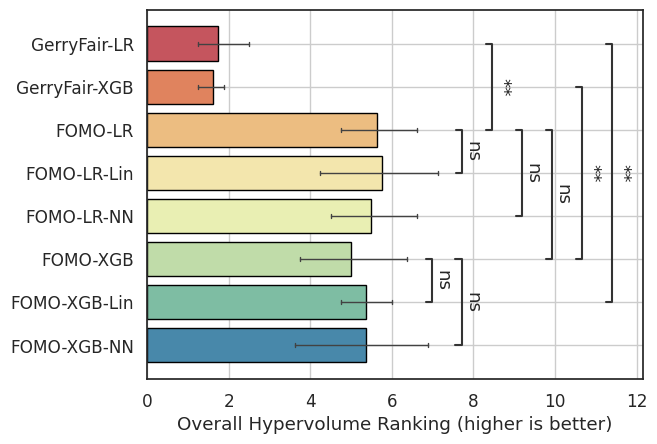

In [24]:
df_plt = df_ranks.melt(
    id_vars = [
        'method_nice',
        
    ],
    value_vars = [
        'rank_hv(subgroup_fpr:auc_roc)',
        'rank_hv(subgroup_fnr:auc_roc)'
    ]
)
# df_plt.method_nice = df_plt.method_nice.astype('category')
shared_args = dict(
    data=df_plt.drop(columns='variable'),
    y='method_nice',
    x='value',
    order=OrderNice,
)
ax = sns.barplot(
    **shared_args,
    palette='Spectral',
    edgecolor=(0,0,0),
    capsize=0.1,
    errwidth=1,
    fill=True,
)
# ax.set_xticklabels(
# #     ax.get_xticklabels(),
#     [x._text for x in ax.get_xticklabels()],
#     rotation=90
# )
ax.set_xlabel('Overall Hypervolume Ranking (higher is better)')
plt.ylabel('')
################################################################################
# add stat annotations
from statannotations.Annotator import Annotator
from itertools import combinations
# pairs = list(combinations(OrderNice, 2) )
# for p in pairs:
#     print(p)
pairs = [
#     ('GerryFair-LR', 'GerryFair-XGB'),
    ('GerryFair-LR', 'FOMO-LR'),
#     ('GerryFair-LR', 'FOMO-LR-Lin'),
#     ('GerryFair-LR', 'FOMO-LR-NN'),
#     ('GerryFair-LR', 'FOMO-XGB'),
    ('GerryFair-LR', 'FOMO-XGB-Lin'),
#     ('GerryFair-LR', 'FOMO-XGB-NN'),
#     ('GerryFair-XGB', 'FOMO-LR'),
#     ('GerryFair-XGB', 'FOMO-LR-Lin'),
#     ('GerryFair-XGB', 'FOMO-LR-NN'),
    ('GerryFair-XGB', 'FOMO-XGB'),
#     ('GerryFair-XGB', 'FOMO-XGB-Lin'),
#     ('GerryFair-XGB', 'FOMO-XGB-NN'),
    ('FOMO-LR', 'FOMO-LR-Lin'),
    ('FOMO-LR', 'FOMO-LR-NN'),
    ('FOMO-LR', 'FOMO-XGB'),
#     ('FOMO-LR', 'FOMO-XGB-Lin'),
#     ('FOMO-LR', 'FOMO-XGB-NN'),
#     ('FOMO-LR-Lin', 'FOMO-LR-NN'),
#     ('FOMO-LR-Lin', 'FOMO-XGB'),
#     ('FOMO-LR-Lin', 'FOMO-XGB-Lin'),
#     ('FOMO-LR-Lin', 'FOMO-XGB-NN'),
#     ('FOMO-LR-NN', 'FOMO-XGB'),
#     ('FOMO-LR-NN', 'FOMO-XGB-Lin'),
#     ('FOMO-LR-NN', 'FOMO-XGB-NN'),
    ('FOMO-XGB', 'FOMO-XGB-Lin'),
    ('FOMO-XGB', 'FOMO-XGB-NN'),
#     ('FOMO-XGB-Lin', 'FOMO-XGB-NN')
]
annotator = Annotator(
    ax,
    pairs,
    orient='h',
    **shared_args
)
annotator.configure(
    test='Mann-Whitney', 
    text_format='star', 
    loc='inside',
    comparisons_correction='bonferroni'
)
annotator.apply_and_annotate()
ax.grid(True)
plt.savefig('../../paper/figs/hypervolume_comparison/rankings.pdf', dpi=400, bbox_inches='tight')